Zadanie wykonane w grupie:<br>
Maciej Rosiński 239493<br>
Maciej Karpiński 239478<br>
Łukasz Wawrzyniak 239499<br>

In [ ]:
!pip install -q tflite-model-maker


     |████████████████████████████████| 573kB 24.6MB/s 
     |████████████████████████████████| 174kB 53.3MB/s 
     |████████████████████████████████| 6.3MB 59.2MB/s 
     |████████████████████████████████| 849kB 49.8MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 706kB 39.5MB/s 
     |████████████████████████████████| 112kB 56.4MB/s 
     |████████████████████████████████| 133kB 66.0MB/s 
     |████████████████████████████████| 122kB 54.9MB/s 
     |████████████████████████████████| 645kB 51.4MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 1.2MB 45.9MB/s 
     |████████████████████████████████| 1.1MB 53.4MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 358kB 55.9MB/s 
     |████████████████████████████████| 38.2MB 73kB/s 
     |████████████████████████████████| 194kB 57.9MB/s 


In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from google.colab import files

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://github.com/MRosinskiGit/Klasyfikacja-butow/raw/main/database.zip

--2021-05-09 18:12:56--  https://github.com/MRosinskiGit/Klasyfikacja-butow/raw/main/database.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MRosinskiGit/Klasyfikacja-butow/main/database.zip [following]
--2021-05-09 18:12:56--  https://raw.githubusercontent.com/MRosinskiGit/Klasyfikacja-butow/main/database.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23748202 (23M) [application/zip]
Saving to: ‘database.zip’

database.zip        100%[===================>]  22.65M  --.-KB/s    in 0.1s    

2021-05-09 18:12:57 (183 MB/s) - ‘database.zip’ saved [23748202/23748202]



In [ ]:
!mkdir /content/database

In [ ]:
!unzip database

Archive:  database.zip
   creating: database/damskie/
  inflating: database/damskie/035_black-white-kwadraty.jpg  
  inflating: database/damskie/1 (1).jpeg  
  inflating: database/damskie/1 (1).jpg  
 extracting: database/damskie/1 (1).png  
  inflating: database/damskie/1 (10).jpg  
  inflating: database/damskie/1 (11).jpg  
  inflating: database/damskie/1 (12).jpg  
  inflating: database/damskie/1 (13).jpg  
  inflating: database/damskie/1 (14).jpg  
  inflating: database/damskie/1 (15).jpg  
  inflating: database/damskie/1 (16).jpg  
  inflating: database/damskie/1 (17).jpg  
  inflating: database/damskie/1 (18).jpg  
  inflating: database/damskie/1 (19).jpg  
  inflating: database/damskie/1 (2).jpeg  
  inflating: database/damskie/1 (2).jpg  
  inflating: database/damskie/1 (2).png  
  inflating: database/damskie/1 (20).jpg  
  inflating: database/damskie/1 (21).jpg  
  inflating: database/damskie/1 (22).jpg  
  inflating: database/damskie/1 (23).jpg  
  inflating: database/damskie

In [ ]:
image_path = '/content/database'

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.79)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 354, num_label: 6, labels: damskie, kalosze, klapki, sportowe, wyjsciowe, zimowe.


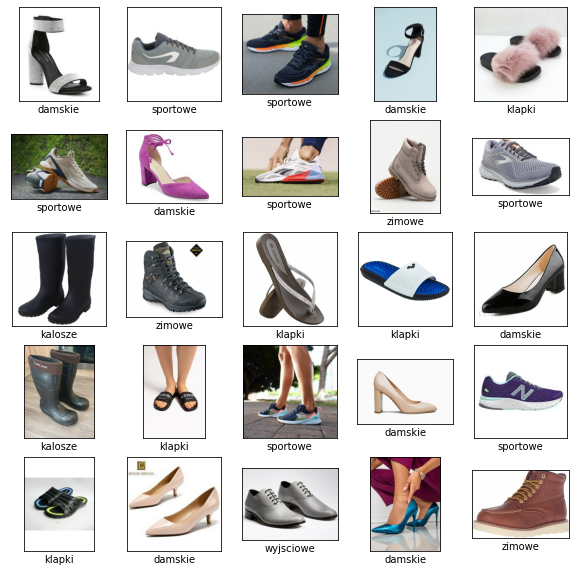

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=50)



INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/50
8/8 [==============================] - 40s 889ms/step - loss: 1.8538 - accuracy: 0.2215 - val_loss: 1.5860 - val_accuracy: 0.4062
Epoch 2/50
8/8 [==============================] - 6s 859ms/step - loss: 1.3612 - accuracy: 0.5553 - val_loss: 1.1080 - val_accuracy: 0.8438
Epoch 3/50
8/8 [=============================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 2s 381ms/step - loss: 0.5493 - accuracy: 0.9737


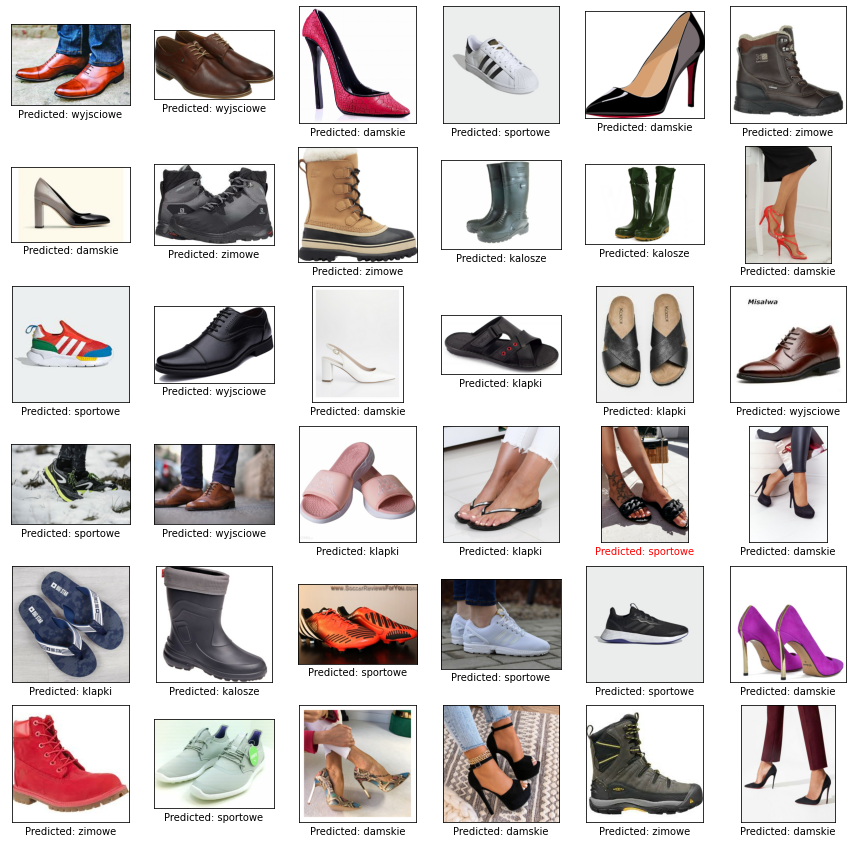

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(15, 15))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(36)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpp5xcnj57/assets


INFO:tensorflow:Assets written to: /tmp/tmpp5xcnj57/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpmcua4jmy/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpmcua4jmy/labels.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite
